In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from config import config as cfg

using data from linux


the protein of interest (green) （蛋白质）plus three cellular landmarks:
nucleus (blue)（细胞核）
microtubules (red)(微管),
endoplasmic reticulum (yellow)(内质网).

绿色用来做预测，其他图像作为参考

训练图像个数 31072.0
sample path:--- 
 /home/share/data_repos/hpi/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png 
 /home/share/data_repos/hpi/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png 
 /home/share/data_repos/hpi/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_red.png 
 /home/share/data_repos/hpi/train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_yellow.png


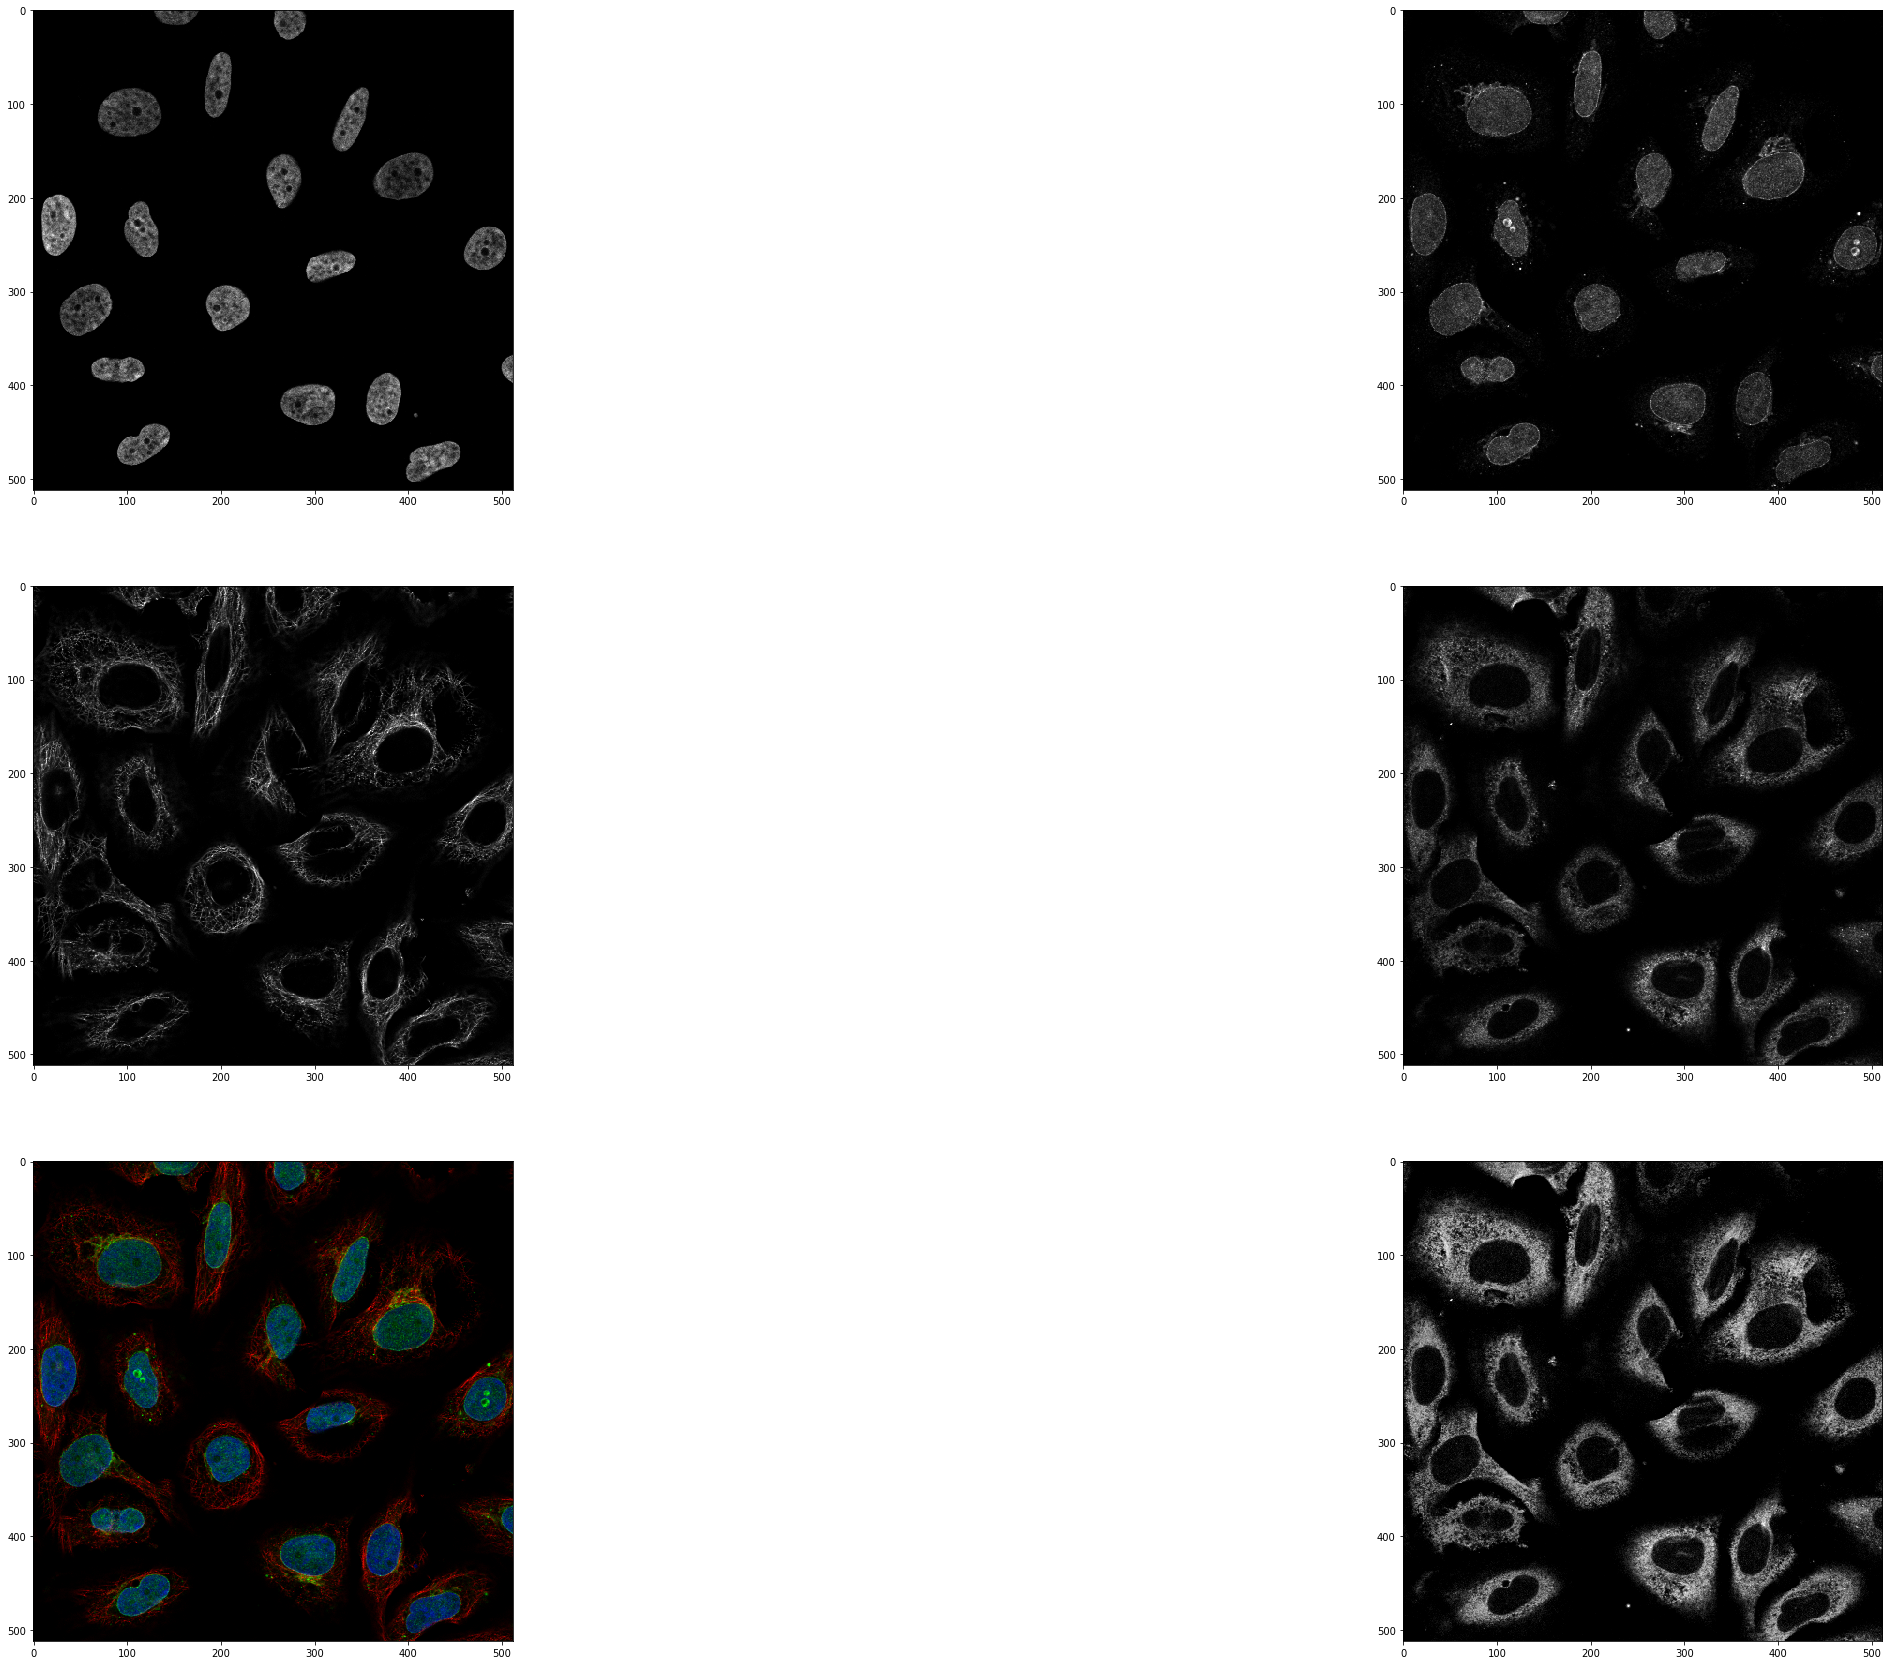

In [55]:
import glob
import os
from skimage import io
import numpy as np
from skimage.exposure import equalize_adapthist

train_images = glob.glob(os.path.join(cfg.train_dir, '*.png'))
train_images = sorted(train_images)
print('训练图像个数', len(train_images) / 4)
print('sample path:---', '\n', 
      train_images[0], '\n',
      train_images[1], '\n', 
      train_images[2], '\n',
      train_images[3])

img_b = io.imread(train_images[4]) # 512 x 512
img_g = io.imread(train_images[5])
img_r = io.imread(train_images[6])
img = np.stack([img_r, img_g, img_b], axis=-1)
img_y = io.imread(train_images[7])
plt.figure(figsize=(45, 30))
plt.subplot(321)
plt.imshow(img_b, cmap='gray')
plt.subplot(322)
plt.imshow(img_g, cmap='gray')
plt.subplot(323)
plt.imshow(img_r, cmap='gray')
plt.subplot(324)
plt.imshow(img_y, cmap='gray')
plt.subplot(325)
plt.imshow(img)
img_eq = equalize_adapthist(img_y)
plt.subplot(326)
plt.imshow(img_eq, cmap='gray')

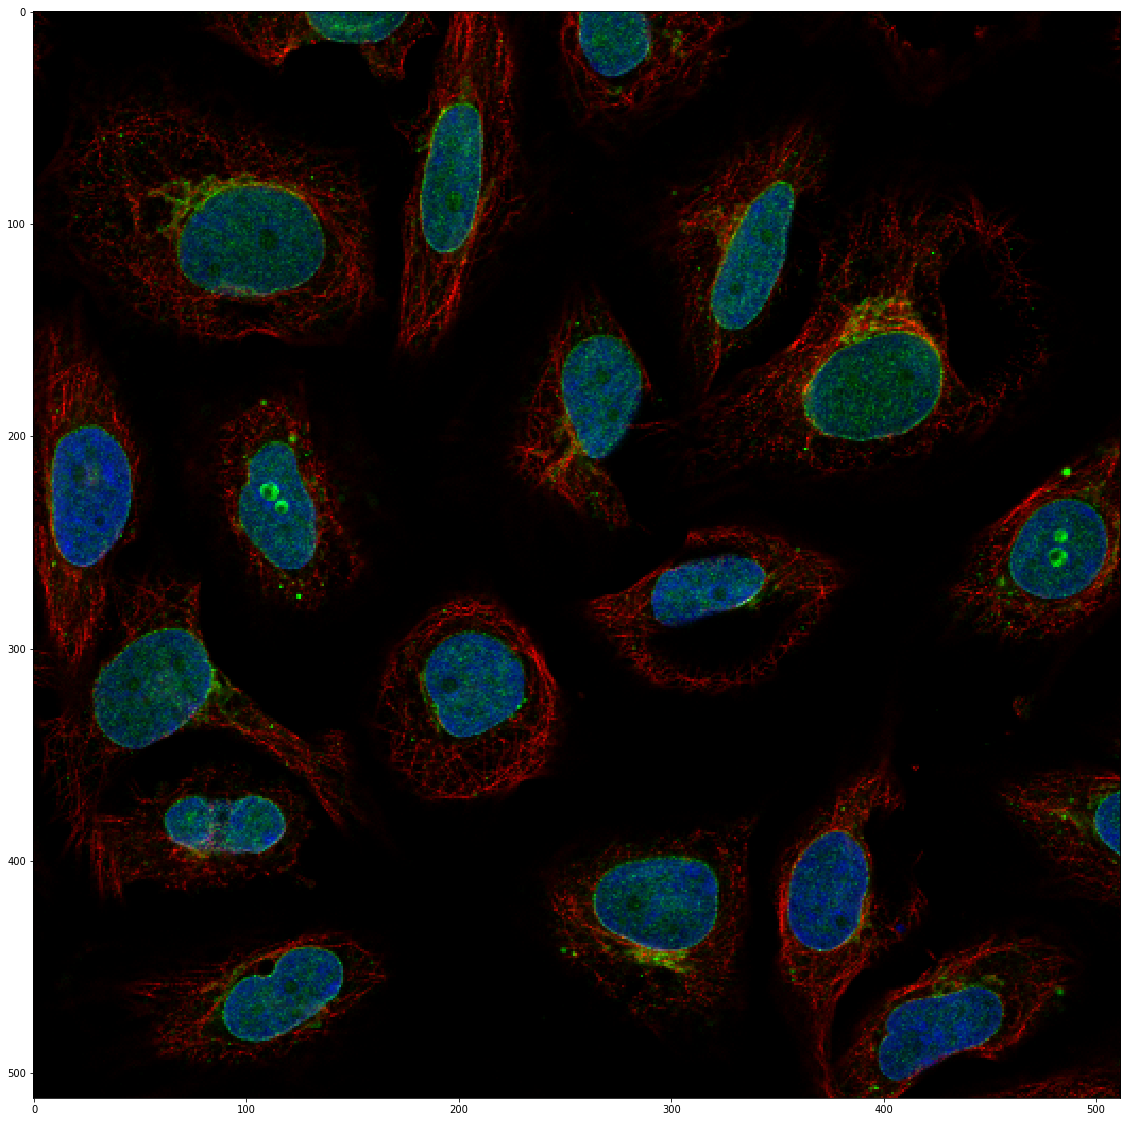

In [56]:
plt.figure(figsize=(20, 20))
plt.imshow(img)

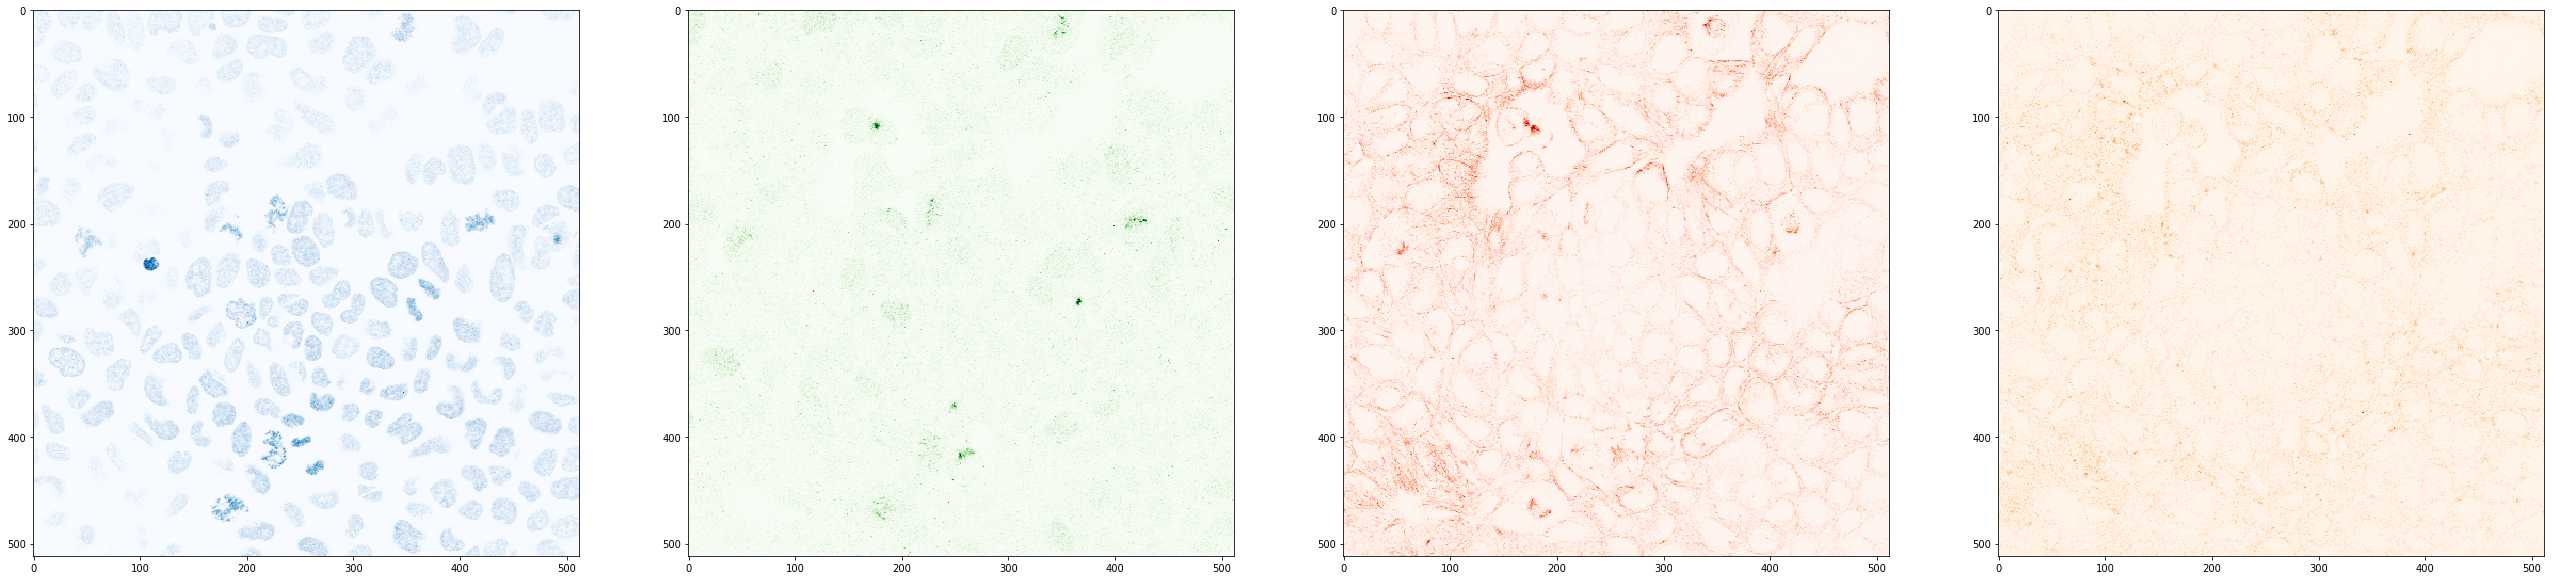

In [112]:
plt.figure(figsize=(45, 15))
plt.subplot(141)
plt.imshow(img_b, cmap='Blues')
plt.subplot(142)
plt.imshow(img_g, cmap='Greens')
plt.subplot(143)
plt.imshow(img_r, cmap='Reds')
plt.subplot(144)
plt.imshow(img_y, cmap='Oranges')

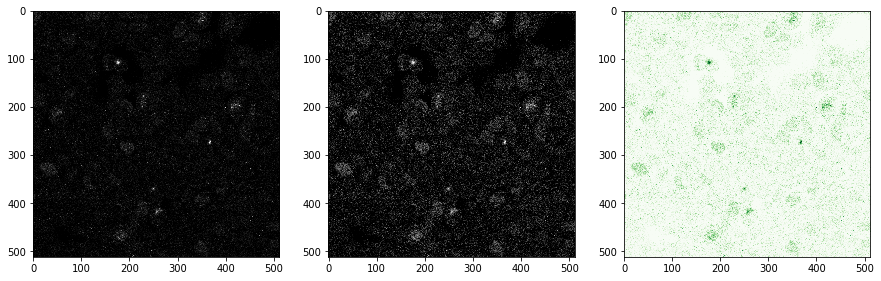

In [115]:
img_eq = equalize_adapthist(img_g)
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.imshow(img_g, cmap='gray')
plt.subplot(132)
plt.imshow(img_eq, cmap='gray')
plt.subplot(133)
plt.imshow(img_eq, cmap='Greens')

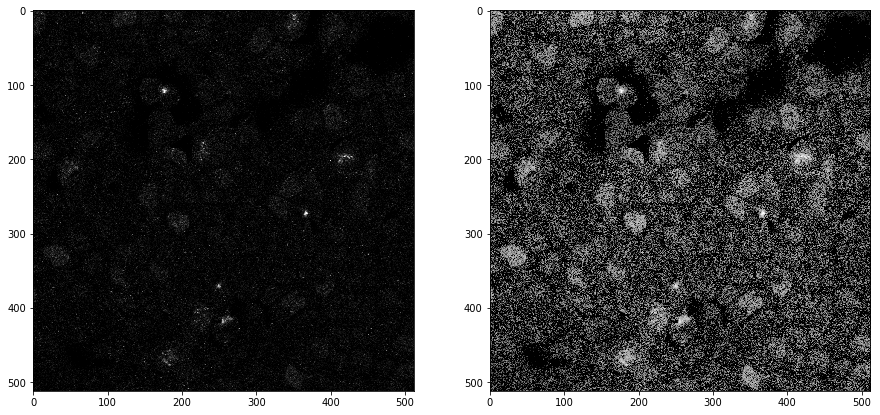

In [45]:
img_eq = equalize_adapthist(img_g, clip_limit=0.05)
plt.figure(figsize=(15, 30))
plt.subplot(121)
plt.imshow(img_g, cmap='gray')
plt.subplot(122)
plt.imshow(img_eq, cmap='gray')

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


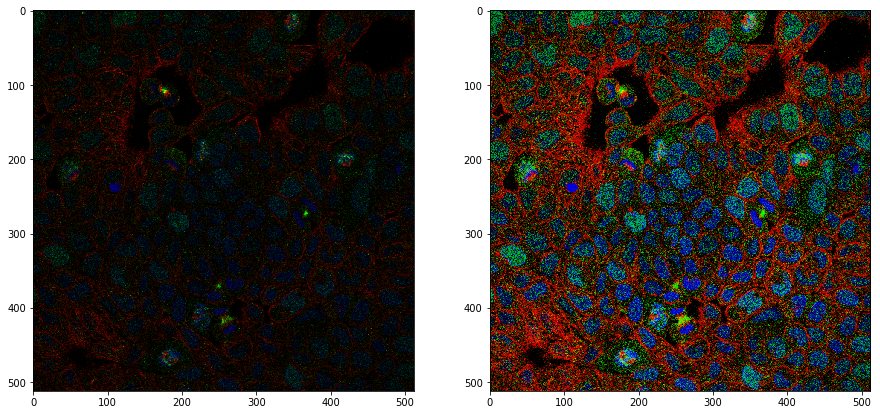

In [42]:
img_eq = equalize_adapthist(img, clip_limit=0.02)
plt.figure(figsize=(15, 30))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_eq, cmap='gray')

In [34]:
img_g.max(), img_g.min()

(255, 0)

In [3]:
import pandas as pd
train_labels = pd.read_csv(cfg.train_csv)
print('label个数： ', train_labels.shape[0])
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}
reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
        
    return row
# 全部填充0
for key in label_names.keys():
    train_labels[label_names[key]] = 0
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

label个数：  31072


Id        Target  Nucleoplasm  \
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]            1   
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]            1   
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]            0   
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]            0   
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]            0   

   Nuclear membrane  Nucleoli  Nucleoli fibrillar center  Nuclear speckles  \
0                 0         0                          0                 0   
1                 1         1                          0                 0   
2                 0         0                          0                 0   
3                 1         0                          0                 0   
4                 0         0                          0                 0   

   Nuclear bodies  Endoplasmic reticulum  Golgi apparatus      ...       \
0               0                      0                0      ...        
1               0                      0                1      ...        
2               1                      0                0      ...        
3               0                      0                0      ...        
4               0                      0                0      ...        

   Microtubule organizing center  Centrosome  Lipid droplets  Plasma membrane  \
0                              0           0               0                0   
1                              0           0               0                0   
2                              0           0               0                0   
3                              0           0               0                0   
4                              1           0               0                0   

   Cell junctions  Mitochondria  Aggresome  Cytosol  Cytoplasmic bodies  \
0               0             0          0        0                   0   
1               0             0          0        0                   0   
2               0             0          0        0                   0   
3               0             0          0        0                   0   
4               0             0          0        0                   0   

   Rods & rings  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 30 columns]

Nucleoplasm                    	 12885 	0.25
Cytosol                        	 8228 	0.16
Plasma membrane                	 3777 	0.07
Nucleoli                       	 3621 	0.07
Mitochondria                   	 2965 	0.06
Golgi apparatus                	 2822 	0.06
Nuclear bodies                 	 2513 	0.05
Nuclear speckles               	 1858 	0.04
Nucleoli fibrillar center      	 1561 	0.03
Centrosome                     	 1482 	0.03
Nuclear membrane               	 1254 	0.02
Intermediate filaments         	 1093 	0.02
Microtubules                   	 1066 	0.02
Endoplasmic reticulum          	 1008 	0.02
Microtubule organizing center  	 902 	0.02
Cell junctions                 	 802 	0.02
Actin filaments                	 688 	0.01
Focal adhesion sites           	 537 	0.01
Cytokinetic bridge             	 530 	0.01
Cytoplasmic bodies             	 328 	0.01
Aggresome                      	 322 	0.01
Mitotic spindle                	 210 	0.00
Lipid droplets                 	 172 	0

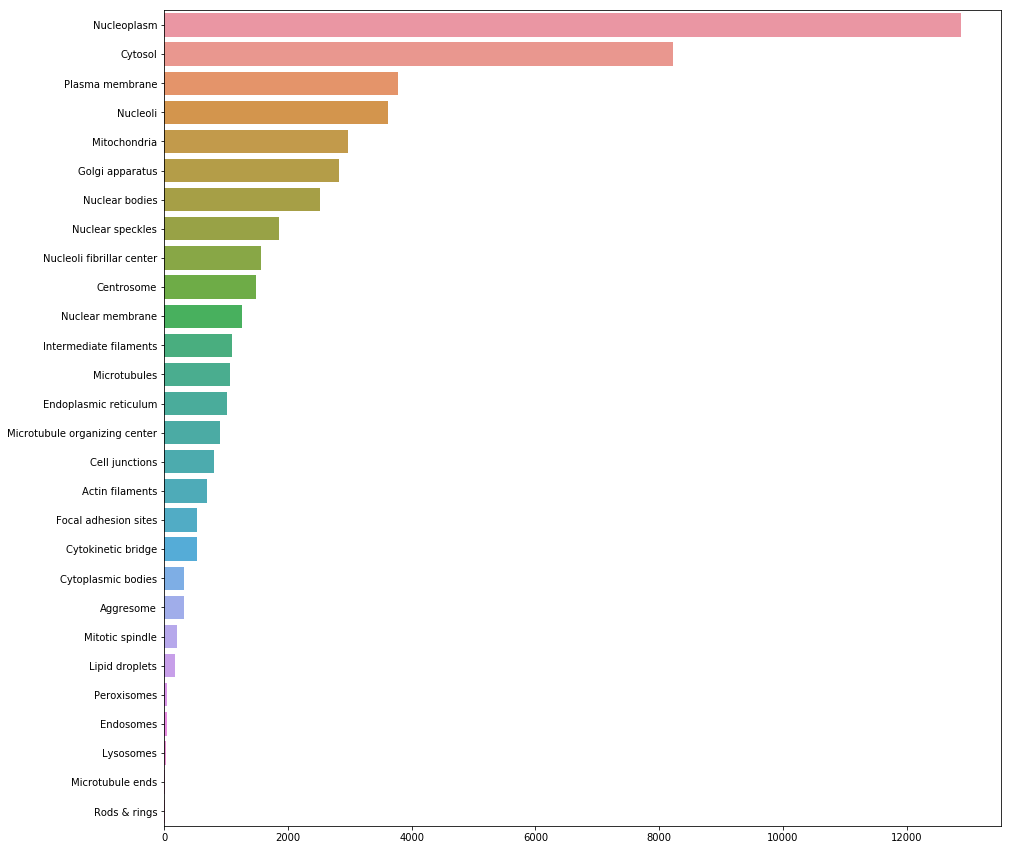

In [86]:
import seaborn as sns
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
g = sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)
for value , percent, item in zip(target_counts.ravel(), target_counts.ravel() / np.sum(target_counts.ravel()), target_counts.index.values):
    print('%-30s' % item, '\t', value, '\t%.2f' % percent)

90%的数据不到2个label

Text(0,0.5,'% of data')

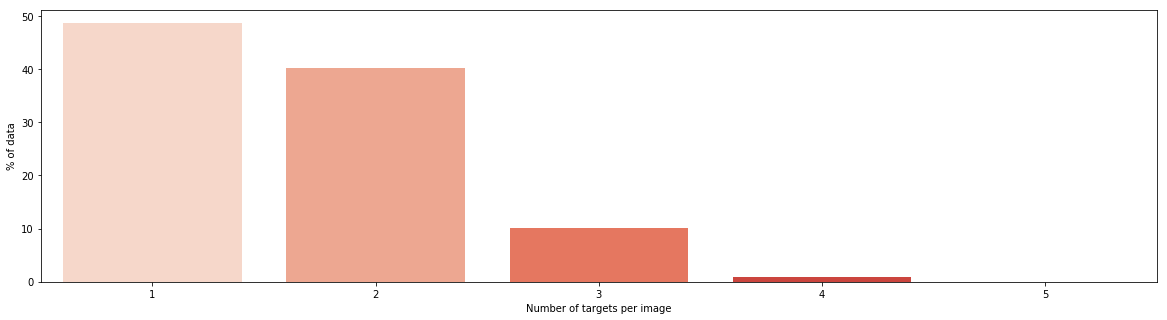

In [87]:
train_labels["number_of_targets"] = train_labels.drop(["Id", "Target"], axis=1).sum(axis=1)
count_perc = np.round(100 * train_labels["number_of_targets"].value_counts() / train_labels.shape[0], 2)
plt.figure(figsize=(20,5))
sns.barplot(x=count_perc.index.values, y=count_perc.values, palette="Reds")
plt.xlabel("Number of targets per image")
plt.ylabel("% of data")

 endosomes （45个）和 lysosomes（28个） 拥有很高的相关性，经常同时出现
 
 mitotic spindle(纺锤体)和cytokinetic bridge（细胞动力学桥）经常一起出现在有丝分裂中

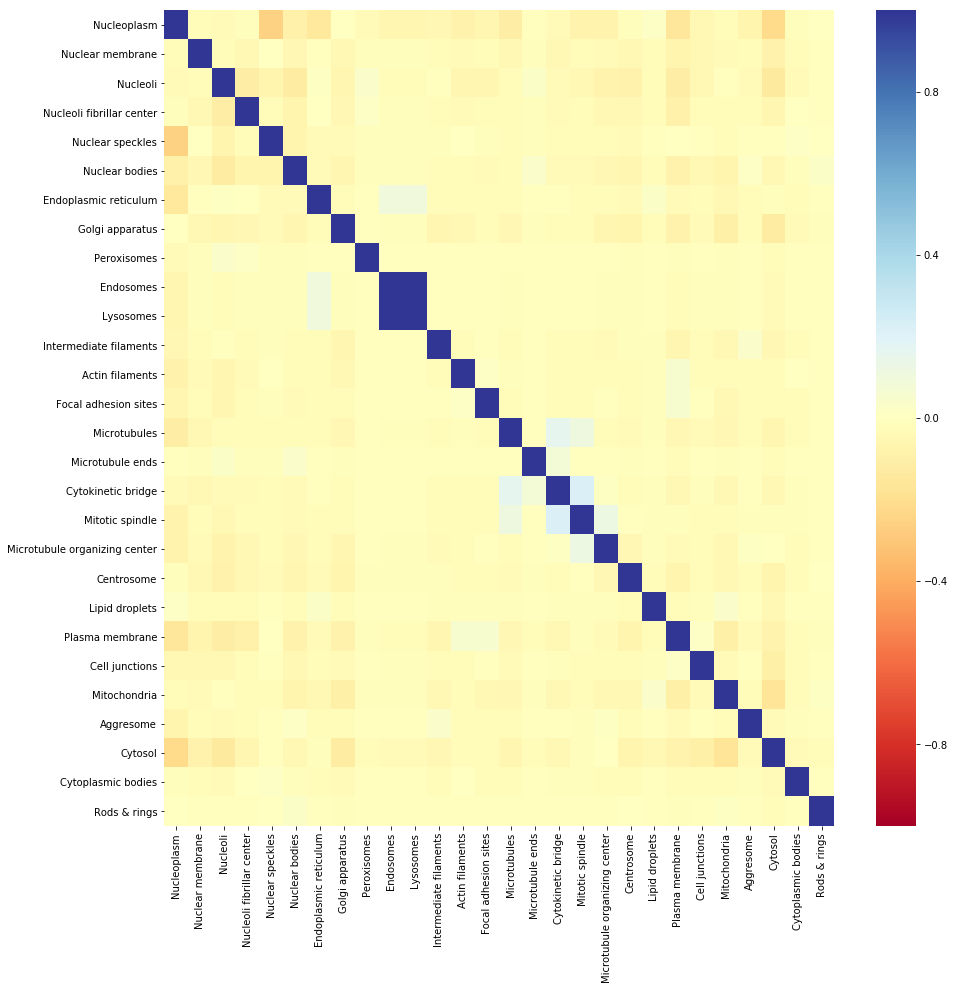

In [88]:
plt.figure(figsize=(15,15))
sns.heatmap(train_labels[train_labels.number_of_targets > 1].drop(["Id", "Target", "number_of_targets"], axis=1).corr(),
            cmap="RdYlBu",
            vmin=-1,
            vmax=1)

In [100]:
(train_labels['Endosomes'].sum(), 
 train_labels['Lysosomes'].sum(),
 (train_labels['Lysosomes'] * train_labels['Endosomes']).sum())

(45, 28, 28)

In [101]:
(train_labels['Mitotic spindle'].sum(), 
train_labels['Cytokinetic bridge'].sum(), 
(train_labels['Mitotic spindle']* train_labels['Cytokinetic bridge']).sum())

(210, 530, 77)

寻找同时出现的类别

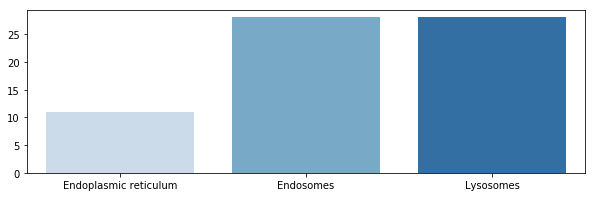

In [102]:
def find_counts(special_target, labels):
    counts = labels[labels[special_target] == 1].drop(
        ["Id", "Target", "number_of_targets"],axis=1
    ).sum(axis=0)
    counts = counts[counts > 0]
    counts = counts.sort_values()
    return counts

lyso_endo_counts = find_counts("Lysosomes", train_labels)
plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

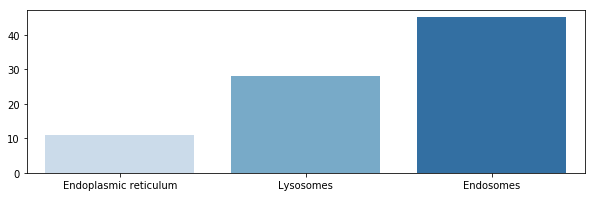

In [122]:
lyso_endo_counts = find_counts("Endosomes", train_labels)
plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

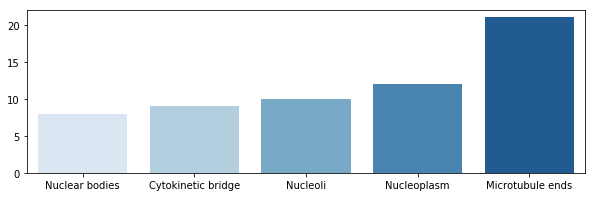

In [123]:
lyso_endo_counts = find_counts("Microtubule ends", train_labels)
plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

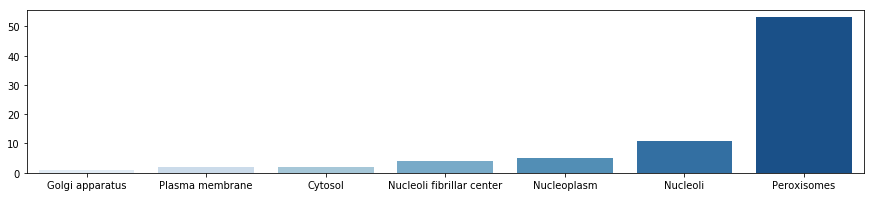

In [127]:
lyso_endo_counts = find_counts("Peroxisomes", train_labels)
plt.figure(figsize=(15,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

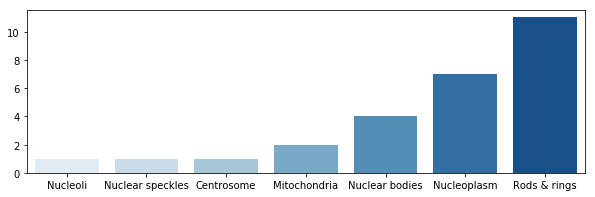

In [103]:
lyso_endo_counts = find_counts("Rods & rings", train_labels)
plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

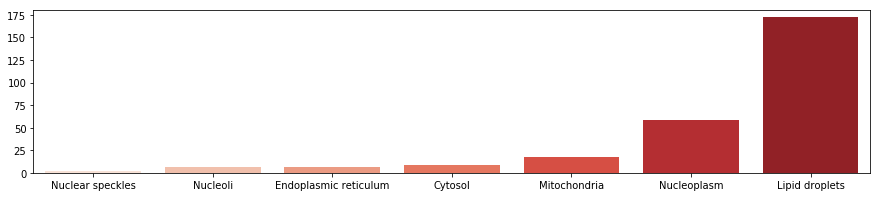

In [150]:
peroxi_counts = find_counts("Lipid droplets", train_labels)
plt.figure(figsize=(15,3))
sns.barplot(x=peroxi_counts.index.values, y=peroxi_counts.values, palette="Reds")

In [120]:
test_images = glob.glob(os.path.join(cfg.test_dir, '*.png'))
percentage = np.round(len(test_images) / len(train_images) * 100)
print('测试集数量：', len(test_images))
print("The test set size turns out to be {} % compared to the train set.".format(percentage))

测试集数量： 46808
The test set size turns out to be 38.0 % compared to the train set.


In [121]:
from sklearn.model_selection import RepeatedKFold
RepeatedKFold?

In [ ]:
splitter = RepeatedKFold(n_splits=3, n_repeats=1, random_state=42)

In [13]:
train_labels.iloc[1, 0]

'000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0'

In [10]:
import numpy as np
sample = np.array(train_labels.iloc[1, 2:], dtype='float32')

In [17]:
train_labels.iloc[1]

Id                               000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
Target                                                   [7, 1, 2, 0]
Nucleoplasm                                                         1
Nuclear membrane                                                    1
Nucleoli                                                            1
Nucleoli fibrillar center                                           0
Nuclear speckles                                                    0
Nuclear bodies                                                      0
Endoplasmic reticulum                                               0
Golgi apparatus                                                     1
Peroxisomes                                                         0
Endosomes                                                           0
Lysosomes                                                           0
Intermediate filaments                                              0
Actin filaments     

In [18]:
img_b.max()

147

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


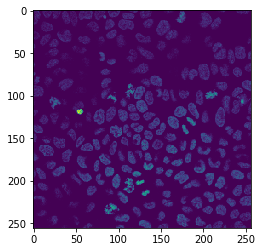

In [26]:
from skimage.transform import resize
re_img = resize(img_b, (256, 256), preserve_range=True)
plt.imshow(re_img)

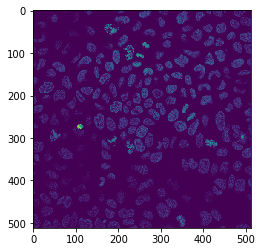

In [45]:
plt.imshow(np.flip(img_b, axis=0))

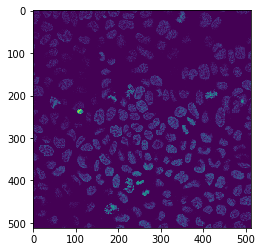

In [46]:
plt.imshow(img_b)

In [32]:
np.rot90?

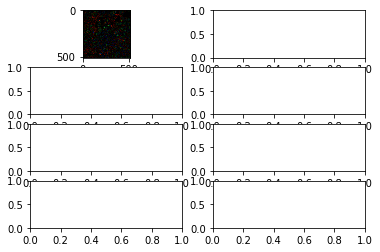

In [42]:
fig, axes = plt.subplots(4,2)
axes = axes.ravel()
axes[0].imshow(img)

In [47]:
np.array(None)

array(None, dtype=object)